<a href="https://colab.research.google.com/github/iitkgroup21/EE954_ASSIGNMENT_GR21/blob/anup_norm_rollback/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Dataset
### Context

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

### Key Characteristics

* **Image Resolution:** Each image in the MNIST dataset is 28x28 pixels, with a single color channel (grayscale).
* **Number of Classes:** The dataset has 10 classes, representing the digits 0 through 9.
* **Color Format:** Grayscale (1 channel), with pixel values ranging from 0 to 255 in the raw data. After applying transforms.ToTensor(), these values are scaled between 0 and 1.

### Dataset Composition
* **Training Set:** 60,000 images, used for training models.
* **Test Set:** 10,000 images, used for evaluating model performance.

### Typical Usage
The dataset is often divided into three subsets for practical machine learning workflows:

* **Training Set (90% of the original training data)**: Used for training the model on 54,000 images.
* **Validation Set (10% of the original training data):** Used for tuning hyperparameters and preventing overfitting, with 6,000 images.
* **Test Set (100% of the original Testing data):** Used for final evaluation, with 10,000 images.

#### Labels

Each training and test example is assigned to one of the following labels:

* 0 T-shirt/top
* 1 Trouser
* 2 Pullover
* 3 Dress
* 4 Coat
* 5 Sandal
* 6 Shirt
* 7 Sneaker
* 8 Bag
* 9 Ankle boot


#### Transformation

* **ToTensor:** Converts each image to a PyTorch tensor and scales the pixel values to the range [0, 1].



## Basic concepts of CNN model :

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm that can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image, and be able to differentiate one from the other.

Three basic components to define a basic convolutional neural network.

*   The Convolutional Layer
*   The Pooling layer
*   The Output layer
###### Image Reference (https://media.licdn.com/dms/image/v2/D5612AQGOui8XZUZJSA/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1680532048475?e=1735776000&v=beta&t=Evq_XWpAo5JDVF4dy5tw2L8E7KDUgYwDrKtnTi5Go_I)
![](https://media.licdn.com/dms/image/v2/D5612AQGOui8XZUZJSA/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1680532048475?e=1735776000&v=beta&t=Evq_XWpAo5JDVF4dy5tw2L8E7KDUgYwDrKtnTi5Go_I)





# Code Explanation
## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split, TensorDataset
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
from torchsummary import summary
import torch
from sklearn.metrics import confusion_matrix, classification_report
import torch
import torch.nn.functional as F

## locating the Dataset

In [2]:
dataset_location = root = './data/'

## Data Preparation
### Loading FashionMNIST Dataset
Loads the FashionMNIST dataset and applies the `ToTensor` transformation to convert images to PyTorch tensors and normalizes the pixel values.

In [3]:
training_dataset = datasets.FashionMNIST(dataset_location,
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

test_dataset = datasets.FashionMNIST(dataset_location,
                              train=False,
                              transform=transforms.ToTensor(),
                              download=True)
print("training dataset length =", len(training_dataset), "test dataset length =", len(test_dataset))
nc = 10 #number of classes

100%|██████████| 26.4M/26.4M [00:01<00:00, 15.8MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 273kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.07MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.59MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

training dataset length = 60000 test dataset length = 10000


### Dataset Ratios and Sizes Initialization

- **Defining Ratios for Dataset Splits**:  
  These variables determine the proportion of the entire dataset that will be used for training, validation, and testing.
  - `train_dataset_ratio = 0.9`: 90% of the dataset will be used for training.
  - `validation_dataset_ratio = 0.1`: 10% of the dataset will be used for validation.
  - `test_dataset_ratio = 1.0`: The test ratio is set to 1.0, meaning the entire test dataset will be utilized for testing.

- **Calculating Dataset Sizes**:  
  The dataset sizes are calculated based on the defined ratios and the total size of each dataset.
  - `train_dataset_size`: The total number of samples in the training set, computed by multiplying the training ratio by the length of `training_dataset`.
  - `test_dataset_size`: The total number of samples in the test set, computed by multiplying the test ratio by the length of `test_dataset`.
  - `validation_dataset_size`: The number of samples in the validation set, computed by applying the validation ratio to the `training_dataset`.

- **Creating New Train and Validation Datasets**:  
  The training and validation datasets are generated by randomly splitting `training_dataset` into `new_train_dataset` and `new_validation_dataset` using the previously calculated sizes.

In [4]:
#Initializing the ratios for the test, training and validation datasets
train_dataset_ratio = 0.9
validation_dataset_ratio = 0.1
test_dataset_ratio = 1.0

#Initalizing the new values of the training, testing and validation data sizes
train_dataset_size = int(train_dataset_ratio * len(training_dataset))
test_dataset_size = int(test_dataset_ratio * len(test_dataset))
validation_dataset_size = int(validation_dataset_ratio * len(training_dataset))

#create the datasets with the sizes
new_train_dataset, new_validation_dataset = torch.utils.data.random_split(training_dataset, [train_dataset_size, validation_dataset_size])
print(f"train_dataset_size = {train_dataset_size}, test_dataset_size = {test_dataset_size}, validation_dataset_size = {validation_dataset_size}, new_train_dataset length = {len(new_train_dataset)}, new_validation_dataset length = {len(new_validation_dataset)}")


train_dataset_size = 54000, test_dataset_size = 10000, validation_dataset_size = 6000, new_train_dataset length = 54000, new_validation_dataset length = 6000


## Data Visualization

In [5]:
# @title
sample_image, sample_label = new_train_dataset[0]
print(f"Min pixel value: {sample_image.min().item()}, Max pixel value: {sample_image.max().item()}")

Min pixel value: 0.0, Max pixel value: 1.0


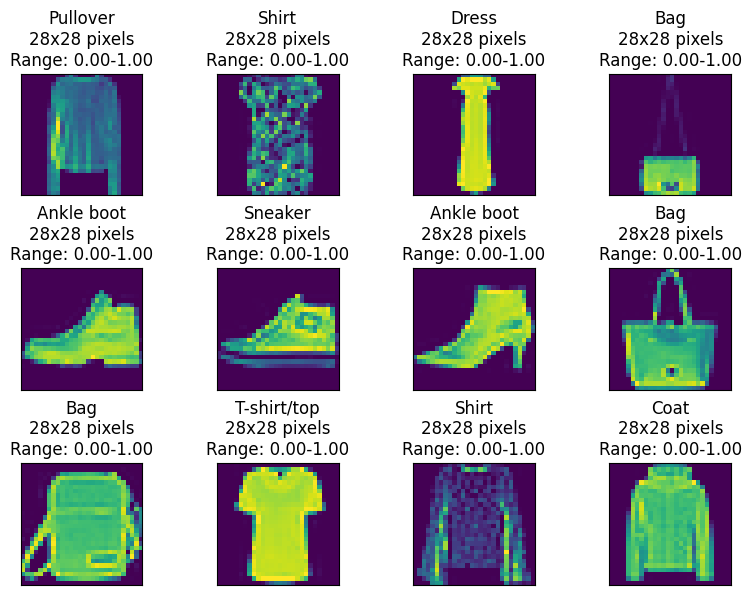

In [6]:

#Defining class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Displaying a 4x4 grid of the first 16 images in the dataset with pixel size and pixel range
plt.figure(figsize=(8, 8))
for i in range(12):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image, label = new_train_dataset[i]

    min_pixel = image.min().item()
    max_pixel = image.max().item()

    plt.imshow(image.reshape((28,28)).squeeze())
    # Display the class name, pixel size, and pixel range in the title
    plt.title(f"{class_names[label]}\n28x28 pixels\nRange: {min_pixel:.2f}-{max_pixel:.2f}")

plt.tight_layout()
plt.subplots_adjust(hspace=0.6)
plt.show()

## Further Data Visualization

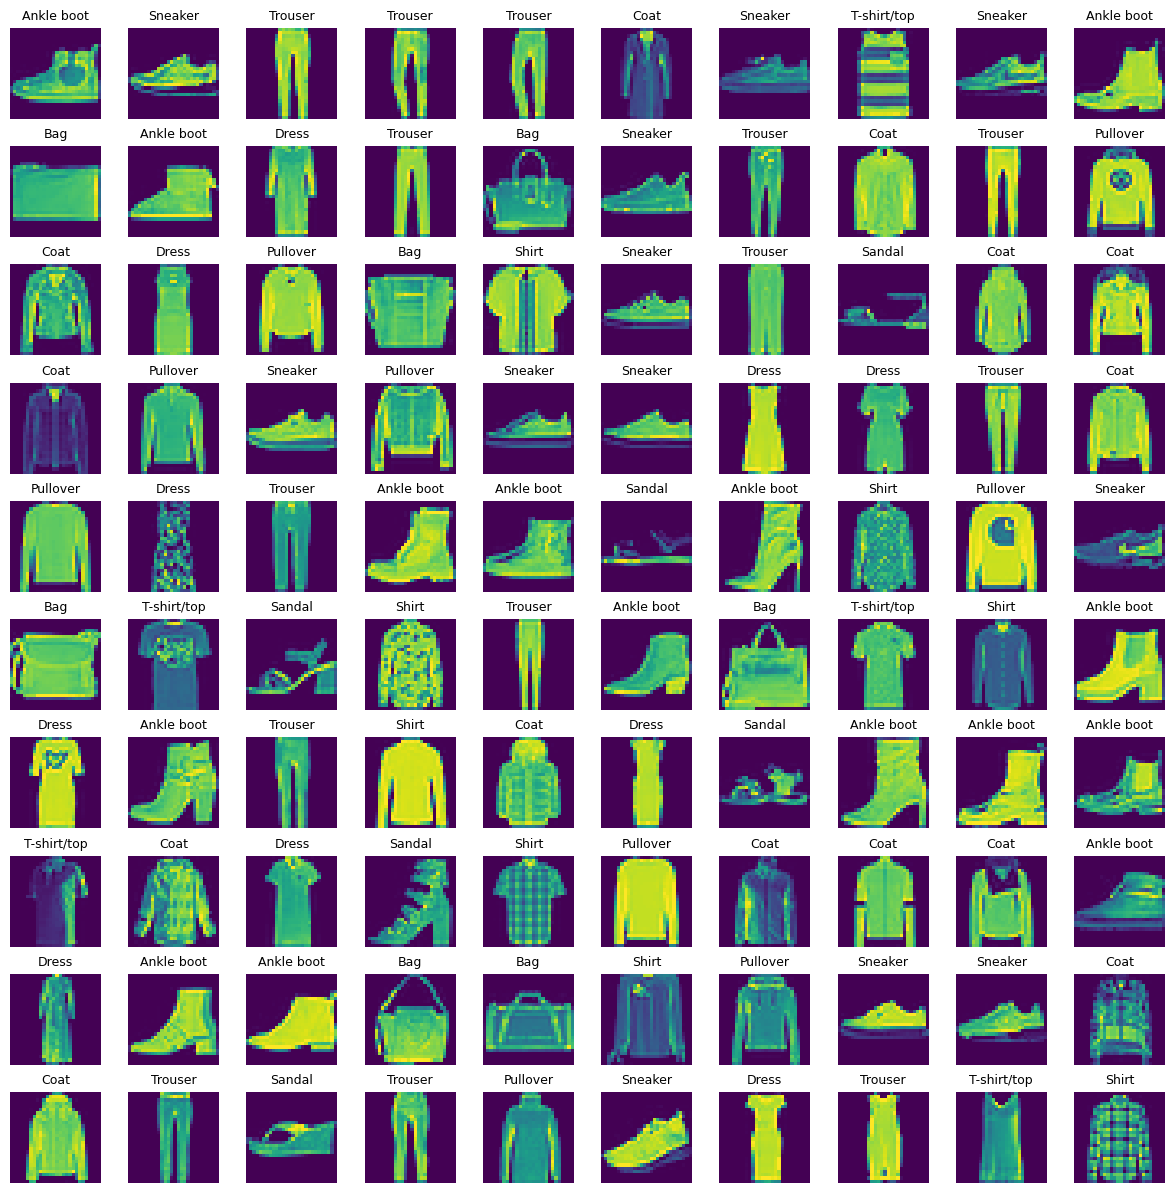

In [7]:
# Now, display a random 15x15 grid of images
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))
axes = axes.ravel()
n_train = len(new_train_dataset)

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_train)
    sample_image, sample_label = new_train_dataset[index]
    axes[i].imshow(sample_image.reshape((28,28)))
    axes[i].set_title(class_names[sample_label], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

## Model Definition
### Custom Convolutional Neural Network
Defines a custom Convolutional Neural Network (CNN) with layers for convolution, batch normalization, activation, and pooling.

In [8]:
class CustomModel(nn.Module):
     def __init__(self):
       super(CustomModel, self).__init__()
       self.conv_layer = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=16),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            )
     def forward(self, x):
            x = self.conv_layer(x)
            return x

# Initialize DataLoaders to retrieve batches of data

In [9]:
train_loader = DataLoader(new_train_dataset, batch_size=64, shuffle=True, drop_last=True)
val_loader = DataLoader(new_validation_dataset, batch_size=64, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True, drop_last=False)

## Class `NeuralNetwork`

The `NeuralNetwork` class implements a fully connected neural network with several key functionalities:

- **Attributes:**
  - `layers`: Stores tuples of weights and biases for each layer.
  - `activation_functions`: Lists the activation functions used in each layer.
  - `layer_data`: Contains dictionaries with detailed information about each layer, such as neuron counts and parameter sizes.
  - `activations`: Holds the activations produced during the feedforward process for each layer.

- **Methods:**
  - `addnetwork(input_size, input_layers_config, output_layers_config)`: Adds layers to the neural network based on the provided configurations.
  - `display_parameters()`: Returns a DataFrame summarizing the network's parameters, including the number of neurons, weights, and biases for each layer.
  - `flatten(X)`: Flattens the input data, typically used for converting images to 1D vectors.
  - `relu(x)`: Applies the ReLU activation function.
  - `relu_derivative(x)`: Computes the derivative of the ReLU function for backpropagation.
  - `softmax(x)`: Applies the softmax function to convert logits to probabilities.
  - `feedforward(X)`: Performs a feedforward pass through the network, computing activations for each layer.
  - `compute_loss(yHat, y)`: Calculates the cross-entropy loss between the predicted and actual values.
  - `backwardpass(X, y, yHat, learning_rate)`: Conducts backpropagation to update weights and biases based on the computed gradients.
  - `calculate_accuracy(yHat, y)`: Computes the classification accuracy by comparing the predicted labels with the true labels.

In [10]:
#Fully connected layer
class NeuralNetwork:

    def __init__(self):
      self.layers = []
      self.activation_functions = []
      self.layer_data = []
      self.activations = []

    def addnetwork(self, input_size, input_layers_config, output_layers_config):

      #addition the first layer
      neurons = input_size
      activation = input_layers_config[0]['activation']

      first_layer_neuron = input_layers_config[0]['neurons']

      # Initialize weights and biases for the first layer
      weights = np.random.randn(input_size, first_layer_neuron)
      bias = np.zeros((1, first_layer_neuron))

      # Store layer information
      self.layer_data.append({
          "Layer": "First Layer",
          "Input Neurons": input_size,
          "Output Neurons": first_layer_neuron,
          "Weights": weights.size,
          "Biases": bias.size,
          "Total Parameters": weights.size + bias.size
      })

      # Append weights, biases, and activation function to the model
      self.layers.append((weights, bias))
      self.activation_functions.append(activation)
      current_input_size = first_layer_neuron

      # Addition of hidden layers
      #Initialize the weights and biases for the input layers
      for i, layer in enumerate(input_layers_config[1:], start=1):
        neurons = layer['neurons']
        activation = layer['activation']

        # Initialize weights and biases for the current layer
        weights = np.random.randn(current_input_size, neurons)  # weight initialization
        bias = np.zeros((1, neurons))  # Bias initialization

        # Store layer information
        self.layer_data.append({
          "Layer": f"Hidden Layer {i+1}",
          "Input Neurons": current_input_size,
          "Output Neurons": neurons,
          "Weights": weights.size,
          "Biases": bias.size,
          "Total Parameters": weights.size + bias.size
        })

        # Append weights, biases, and activation function to the model
        self.layers.append((weights, bias))
        self.activation_functions.append(activation)

        # Update current input size for next layer
        current_input_size = neurons

      # Addition of output layers
      # Initialize weights and biases for the output layer
      output_neurons = output_layers_config[0]['neurons']
      output_activation = output_layers_config[0]['activation']
      output_weights = np.random.randn(current_input_size, output_neurons)
      output_bias = np.zeros((1, output_neurons))

      self.layer_data.append({
          "Layer": "Output Layer",
          "Input Neurons": current_input_size,
          "Output Neurons": output_neurons,
          "Weights": output_weights.size,
          "Biases": output_bias.size,
          "Total Parameters": output_weights.size + output_bias.size
        })

      # Append output weights, biases, and activation function
      self.layers.append((output_weights, output_bias))
      self.activation_functions.append(output_activation)

    def display_parameters(self):
      df = pd.DataFrame(self.layer_data)
      return df

    #Flatten each image/sample to a 1D vector
    def flatten(self, X):
      batch_size = X.shape[0]
      return X.reshape(batch_size, -1)

    # Relu activation function
    def relu(self, x):
        return np.maximum(0, x)

    # Derivative of Relu activation function
    def relu_derivative(self, x):
        return np.where(x > 0, 1, 0)

    #Softmax function
    def softmax(self, x):
        exps = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exps / np.sum(exps, axis=1, keepdims=True)

    #Define the feed forward function
    def feedforward(self, X):
      self.activations = [X]
      for i, layer in enumerate(self.layers):
        # Extract weights and biases for the current layer
        weights, bias = layer

        # Matrix multiplication and bias addition
        X = np.dot(X, weights) + bias

        # Apply activation function
        if self.activation_functions[i] == 'relu':
          X = self.relu(X)
        elif self.activation_functions[i] == 'softmax':
          X = self.softmax(X)
        # Store the activation for each layer
        self.activations.append(X)
      yHat = X
      return yHat

    #Define the compute loss function
    def compute_loss(self, yHat, y):
      # Cross-entropy loss
      m = y.shape[0]
      loss = -np.sum(y * np.log(yHat + 1e-9)) / m
      return loss

    #Define the backward pass function
    def backwardpass(self, X, y, yHat, learning_rate=0.01):
      m = y.shape[0]  # Number of examples in the batch

      # Store the derivatives for each layer
      gradients = []

      # Compute the gradient for the output layer (softmax with cross-entropy loss)
      dA = yHat - y  # Gradient of the loss with respect to output (yHat)
      for i in reversed(range(len(self.layers))):
          weights, bias = self.layers[i]
          activation = self.activation_functions[i]

          # Use the stored activation as the input to this layer
          A_prev = self.activations[i]

          # Calculate gradients with respect to weights, biases, and inputs for each layer
          if activation == 'softmax':
              dZ = dA  # dZ for softmax layer
          elif activation == 'relu':
              dZ = dA * self.relu_derivative(self.activations[i + 1])

          # Calculate gradients for weights and biases
          dW = np.dot(A_prev.T, dZ) / m
          db = np.sum(dZ, axis=0, keepdims=True) / m

          # Update the weights and biases
          weights -= learning_rate * dW
          bias -= learning_rate * db

          # Update the layer in the network with the new weights and biases
          self.layers[i] = (weights, bias)
          # Update dA for the next layer in the backpropagation process
          dA = np.dot(dZ, weights.T)

    #Define the calculate_loss function to be used during training
    def calculate_accuracy(self, yHat, y):
        # Calculate accuracy based on predictions and true labels
        pred_classes = np.argmax(yHat, axis=1)
        true_classes = np.argmax(y, axis=1)
        return np.mean(pred_classes == true_classes)


### Define configuration for NeuralNetwork

In [11]:
input_layers_config = [
    {'neurons': 128, 'activation': 'relu'}
]
output_layers_config = [
    {'neurons': 10, 'activation': 'softmax'}
]

### Moving model to GPU if available

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Neural Network Initialization and Layer Addition
In this part of the notebook, we initialize our custom model and neural network, and then add layers to the neural network outside the batch loop. Here's a step-by-step explanation of the code:
1. **Model Initialization**:
   - `CustomModel` is instantiated and moved to the specified device (e.g., CPU or GPU).
   - `NeuralNetwork` is instantiated but not yet populated with layers.
2. **Determining the Shape for Layer Addition**:
   - A sample batch is retrieved from `train_loader` to determine the shape of the output feature map from the custom model.
3. **Forward Pass Through the Custom Model**:
   - The sample batch is passed through the custom model to get the output feature map. The input is moved to the device and converted to `torch.float32`.
4. **Conversion to NumPy Array**:
   - The output feature map is moved back to the CPU, detached from the computational graph, and converted to a NumPy array.
5. **Flattening the Output**:
   - The output feature map is flattened using a method from the `NeuralNetwork` class, preparing it for further processing or layer addition.
By performing these steps outside the batch loop, we ensure that the layer additions and shape calculations are done efficiently, avoiding redundant computations during each batch processing.

In [13]:
model = CustomModel().to(device)
nn_network = NeuralNetwork()
# Adding layers to the neural network outside the batch loop
cnn_output_sample = next(iter(train_loader))[0]  # Get a sample batch to determine the shape
cnn_output_sample = model(cnn_output_sample.to(device).type(torch.float32))
cnn_output_np_sample = cnn_output_sample.cpu().detach().numpy()
cnn_output_np_sample = nn_network.flatten(cnn_output_np_sample)

# Adding layers to the neural network
nn_network.addnetwork(input_size=cnn_output_np_sample.shape[1], input_layers_config=input_layers_config, output_layers_config=output_layers_config)


### Training Hyperparameters and Training Loop

In this section, we define the training hyperparameters and implement the training loop for the neural network.

1. **Setting Training Hyperparameters**:
   - The learning rate and the number of epochs are retrieved configuration.

2. **Training Loop**:
   - **Epoch Loop**: Iterates over the specified number of epochs.
   - **Batch Loop**: Iterates over each batch in the `train_loader`.
     - **Data Preparation**: Moves input and label data to the selected device and converts labels to one-hot encoding.
     - **Forward Pass**: The input batch is passed through the CNN model, and the output is flattened and fed into the fully connected neural network.
     - **Loss Calculation**: Computes the cross-entropy loss between the predicted and true labels.
     - **Accuracy Calculation**: Calculates the accuracy of the predictions.
     - **Backpropagation**: Performs backpropagation to update the model weights and biases.
     - **Epoch Metrics**: Calculates and logs the epoch-level loss

3. **Display Parameters**:
   - Retrieves and displays the neural network parameter DataFrame to summarize the network configuration.

In [14]:
def train_one_epoch(model, train_loader, nn_network, device, nc, learning_rate):
    model.train()  # Set model to training mode
    total_train_loss = 0
    correct_train_preds = 0
    total_train_samples = 0

    for x_batch, y_batch in train_loader:
        # Move input data to the selected device
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        # Prepare labels and input
        y_train = F.one_hot(y_batch, num_classes=nc).type(torch.float32) #recommended to convert to float32 for cross entropy


        # Forward pass through CNN
        cnn_output = model(x_batch)
        cnn_output_np = cnn_output.cpu().detach().numpy()
        cnn_output_np = nn_network.flatten(cnn_output_np)
        #cnn_output_np = cnn_output_np / 255

        # Feedforward pass through fully connected network
        yhat = nn_network.feedforward(cnn_output_np)

        # Compute loss
        y_train_np = y_train.cpu().detach().numpy()
        loss = nn_network.compute_loss(yhat, y_train_np)
        total_train_loss += loss

        # Backpropagation
        nn_network.backwardpass(cnn_output_np, y_train_np, yhat, learning_rate)

        # Calculate training accuracy
        preds = np.argmax(yhat, axis=1)
        correct_train_preds += np.sum(preds == np.argmax(y_train_np, axis=1))
        total_train_samples += y_batch.size(0)

    # Calculate average training loss and accuracy
    train_loss = total_train_loss / len(train_loader)
    train_accuracy = correct_train_preds / total_train_samples

    return train_loss, train_accuracy


In [15]:
def validate(model, val_loader, nn_network, device, nc):
    model.eval()  # Set model to evaluation mode
    total_val_loss = 0
    correct_val_preds = 0
    total_val_samples = 0

    with torch.no_grad():  # Disable gradient calculation for validation
        for x_val_batch, y_val_batch in val_loader:
            x_val_batch = x_val_batch.to(device)
            y_val_batch = y_val_batch.to(device)

            # Prepare labels and input
            y_val = F.one_hot(y_val_batch, num_classes=nc).type(torch.float32)


            # Forward pass through CNN and fully connected network
            cnn_output_val = model(x_val_batch)
            cnn_output_np_val = cnn_output_val.cpu().detach().numpy()
            cnn_output_np_val = nn_network.flatten(cnn_output_np_val)
            #cnn_output_np_val = cnn_output_np_val / 255
            yhat_val = nn_network.feedforward(cnn_output_np_val)

            # Compute validation loss
            y_val_np = y_val.cpu().detach().numpy()
            val_loss = nn_network.compute_loss(yhat_val, y_val_np)
            total_val_loss += val_loss

            # Calculate validation accuracy
            val_preds = np.argmax(yhat_val, axis=1)
            correct_val_preds += np.sum(val_preds == np.argmax(y_val_np, axis=1))
            total_val_samples += y_val_batch.size(0)

    # Calculate average validation loss and accuracy
    val_loss = total_val_loss / len(val_loader)
    val_accuracy = correct_val_preds / total_val_samples

    return val_loss, val_accuracy

In [16]:
def train_and_validate(model, train_loader, val_loader, nn_network, device, nc, learning_rate, epochs):
    train_accuracies, train_losses, val_accuracies, val_losses = [], [], [], []

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")

        # Train the model for one epoch
        train_loss, train_accuracy = train_one_epoch(model, train_loader, nn_network, device, nc, learning_rate)
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        print(f"Train loss: {train_loss:.4f}, Train accuracy: {train_accuracy:.4f}")

        # Validate the model
        val_loss, val_accuracy = validate(model, val_loader, nn_network, device, nc)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)
        print(f"Val loss: {val_loss:.4f}, Val accuracy: {val_accuracy:.4f}")

    return train_accuracies, train_losses, val_accuracies, val_losses

In [ ]:
train_accuracies, train_losses, val_accuracies, val_losses = train_and_validate(
    model, train_loader, val_loader, nn_network, device, nc, learning_rate=0.001, epochs=1
)

In [ ]:
# Retrieve and display the parameter DataFrame
df = nn_network.display_parameters()
print("Parameter Table for Neural Network:")
print(df)

### Model Evaluation Section

- **Evaluation Mode**: The model is set to evaluation mode using `model.eval()`.
- **Class Names**: Defined a list of class names for classification.
- **Predictions and Labels**: Initialized empty lists to store predictions and true labels.
- **Gradient Calculations**: Disabled gradient calculations for efficient evaluation using `torch.no_grad()`.
- **Data Loading**: Loaded test data and moved it to the selected device.
- **Forward Passes**:
  - Passed data through the CNN and converted the output to a numpy array.
  - Passed the numpy array through the fully connected network to get predictions.
- **Accuracy Calculation**: Calculated accuracy by comparing predictions with true labels.
- **Results**:
  - Printed the test accuracy.
  - Generated and printed a classification report using `classification_report` from `sklearn`.
  - Created a confusion matrix and converted it to a DataFrame for better visualization.

In [19]:
def evaluate_model(model, test_loader, device, nn_network, class_names):
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []

    with torch.no_grad():  # Disable gradient calculations for evaluation
        correct = 0
        total = 0
        for x_test, y_test in test_loader:
            # Move data to the selected device
            x_test = x_test.to(device)
            y_test = y_test.to(device)

            # Forward pass through CNN
            cnn_output_test = model(x_test.type(torch.float32))

            # Convert to numpy and flatten if needed
            cnn_output_test_np = nn_network.flatten(cnn_output_test.cpu().detach().numpy())

            # Forward pass through fully connected network
            y_pred = nn_network.feedforward(cnn_output_test_np)

            # Calculate accuracy
            predicted = np.argmax(y_pred, axis=1)
            correct += (predicted == y_test.cpu().numpy()).sum()
            total += y_test.size(0)

            all_preds.extend(predicted)
            all_labels.extend(y_test.cpu().numpy())

    # Calculate accuracy
    accuracy = 100 * correct / total
    print(f"Accuracy score is: {accuracy:.2f}%")

    return accuracy, all_preds, all_labels


In [ ]:
accuracy, all_preds, all_labels = evaluate_model(model, test_loader, device, nn_network, class_names)

### Calculate and print confusion matrix and classification report

In [ ]:
class_report = classification_report(all_labels, all_preds, target_names=class_names, zero_division=0)
print("\nClassification Report:")
print(class_report)
pd.DataFrame(confusion_matrix(all_labels, all_preds),index=class_names, columns=class_names)


In [ ]:
summary(model, input_size=(1, 28, 28))

### Training and Validation Loss vs. Epoch

In [ ]:
epochs = range(1, len(train_losses) + 1)

plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Epoch')
plt.legend()
plt.show()

### Training and Validation Accuracy vs. Epoch

In [ ]:
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Epoch')
plt.legend()
plt.show()

## Function `find_best_model_configuration`
The `find_best_model_configuration` function is designed to identify the optimal hyperparameter configuration for a neural network model by evaluating different configurations from a provided parameter grid. Here are its key steps:

1. **Initialization**: Initializes `best_accuracy` to 0 and `best_params` to `None` to keep track of the best model performance and corresponding parameters.
2. **Parameter Grid Iteration**: Iterates over each set of parameters in `param_grid`.
   - Prints the current configuration being tested.
   - Initializes a new `NeuralNetwork` instance and adds layers according to the specified configurations.
   - Trains and validates the model using the provided `train_and_validate` function, capturing training and validation accuracies and losses.
3. **Validation Accuracy Evaluation**: Identifies the maximum validation accuracy for the current parameter configuration.
4. **Best Model Update**: Updates `best_accuracy` and `best_params` if the current model achieves a higher validation accuracy than previously recorded.
5. **Return Best Configuration**: Returns the best parameter configuration and its corresponding validation accuracy.

This function helps in systematically finding the best hyperparameters for training a neural network model by comparing the accuracy across different configurations.

In [ ]:
def find_best_model_configuration(param_grid, model, train_loader, val_loader, nn_network, device, nc):
    best_accuracy = 0
    best_params = None

    for params in param_grid:
        print(f"Testing configuration: {params}")
        network = NeuralNetwork()
        network.addnetwork(input_size=cnn_output_np_sample.shape[1], input_layers_config=input_layers_config, output_layers_config=output_layers_config)
        train_accuracies, train_losses, val_accuracies, val_losses = train_and_validate(
            model, train_loader, val_loader, network, device, nc, learning_rate=params['learning_rate'], epochs=params['epochs'])
        # Get the best validation accuracy for the current parameter configuration
        max_val_accuracy = max(val_accuracies)

        # Update the best accuracy and parameters if the current model is better
        if max_val_accuracy > best_accuracy:
            best_accuracy = max_val_accuracy
            best_params = params
    return best_params, best_accuracy

# Example usage:
param_grid = [
    {'epochs': 3, 'learning_rate': 0.001},
    {'epochs': 5, 'learning_rate': 0.002},
    {'epochs': 7, 'learning_rate': 0.005},
    {'epochs': 10, 'learning_rate': 0.005},
]

best_params, best_accuracy = find_best_model_configuration(param_grid, model, train_loader, val_loader, nn_network, device, nc)
print(f"Best Configuration: {best_params}")
print(f"Best Validation Accuracy: {best_accuracy:.4f}")

#### Testing configuration: {'epochs': 3, 'learning_rate': 0.001}
##### Epoch 1/3
- Train loss: 10.7914, Train accuracy: 0.4512
- Val loss: 8.0725, Val accuracy: 0.5801
##### Epoch 2/3
- Train loss: 7.4365, Train accuracy: 0.6082
- Val loss: 6.8623, Val accuracy: 0.6342
##### Epoch 3/3
- Train loss: 6.5468, Train accuracy: 0.6464
- Val loss: 6.2607, Val accuracy: 0.6551
#### Testing configuration: {'epochs': 5, 'learning_rate': 0.002}
##### Epoch 1/5
- Train loss: 8.8251, Train accuracy: 0.5444
- Val loss: 6.8757, Val accuracy: 0.6379
##### Epoch 2/5
- Train loss: 6.2891, Train accuracy: 0.6608
- Val loss: 5.8508, Val accuracy: 0.6803
##### Epoch 3/5
- Train loss: 5.6019, Train accuracy: 0.6841
- Val loss: 5.4596, Val accuracy: 0.6892
##### Epoch 4/5
- Train loss: 5.1201, Train accuracy: 0.6961
- Val loss: 4.8842, Val accuracy: 0.6969
##### Epoch 5/5
- Train loss: 4.7005, Train accuracy: 0.7008
- Val loss: 4.5562, Val accuracy: 0.6976
#### Testing configuration: {'epochs': 7, 'learning_rate': 0.005}
##### Epoch 1/7
- Train loss: 7.3070, Train accuracy: 0.6156
- Val loss: 5.4565, Val accuracy: 0.6962
##### Epoch 2/7
- Train loss: 5.0983, Train accuracy: 0.7023
- Val loss: 4.8197, Val accuracy: 0.6944
##### Epoch 3/7
- Train loss: 4.7345, Train accuracy: 0.7031
- Val loss: 3.9649, Val accuracy: 0.7214
##### Epoch 4/7
- Train loss: 5.1187, Train accuracy: 0.6922
- Val loss: 4.8348, Val accuracy: 0.6907
##### Epoch 5/7
- Train loss: 5.9132, Train accuracy: 0.6711
- Val loss: 5.4967, Val accuracy: 0.7001
##### Epoch 6/7
- Train loss: 6.8496, Train accuracy: 0.6454
- Val loss: 7.0964, Val accuracy: 0.6426
##### Epoch 7/7
- Train loss: 8.1887, Train accuracy: 0.5960
- Val loss: 12.0122, Val accuracy: 0.4165
#### Testing configuration: {'epochs': 10, 'learning_rate': 0.005}
##### Epoch 1/10
- Train loss: 7.4169, Train accuracy: 0.6086
- Val loss: 5.5794, Val accuracy: 0.6826
##### Epoch 2/10
- Train loss: 5.2122, Train accuracy: 0.6933
- Val loss: 4.9898, Val accuracy: 0.6897
##### Epoch 3/10
- Train loss: 4.8820, Train accuracy: 0.6935
- Val loss: 6.3172, Val accuracy: 0.6300
##### Epoch 4/10
- Train loss: 5.2460, Train accuracy: 0.6821
- Val loss: 6.4340, Val accuracy: 0.6279
##### Epoch 5/10
- Train loss: 5.8739, Train accuracy: 0.6689
- Val loss: 6.9264, Val accuracy: 0.6295
##### Epoch 6/10
- Train loss: 6.7865, Train accuracy: 0.6465
- Val loss: 5.6618, Val accuracy: 0.7082
##### Epoch 7/10
- Train loss: 8.2675, Train accuracy: 0.5913
- Val loss: 8.3981, Val accuracy: 0.5904
##### Epoch 8/10
- Train loss: 10.0503, Train accuracy: 0.5132
- Val loss: 10.5339, Val accuracy: 0.4911
##### Epoch 9/10
- Train loss: 11.9181, Train accuracy: 0.4247
- Val loss: 12.7369, Val accuracy: 0.3849
##### Epoch 10/10
- Train loss: 12.0890, Train accuracy: 0.4166
- Val loss: 11.5593, Val accuracy: 0.4422
## Best Configuration: {'epochs': 7, 'learning_rate': 0.005}
## Best Validation Accuracy: 0.7214